In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR100 Task IL'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'classes_per_task', 'separate_noise_output'], y_min=0)

In [3]:
viz.extract_all_runs_metrics()

In [4]:
viz.metrics_df

UID  acc_at_the_end_task_0  \
0    stat-wmm;128;True;0.003;20;20;True;               0.600000   
1    stat-wmm;128;True;0.003;20;20;True;               0.400000   
2    stat-wmm;128;True;0.003;20;20;True;               1.250000   
3    stat-wmm;128;True;0.003;20;20;True;               0.900000   
4    stat-wmm;128;True;0.003;20;20;True;               0.300000   
..                                   ...                    ...   
123   stat-wmm;128;True;0.003;20;5;None;              29.400000   
124   stat-wmm;128;True;0.003;20;5;None;              35.000000   
125   stat-wmm;128;True;0.003;20;5;None;              29.000000   
126   stat-wmm;128;True;0.003;20;5;None;              31.200001   
127   stat-wmm;128;True;0.003;20;5;None;              31.000000   

     acc_mean_task_0  acc_mean_decrease_per_task_0   acc_max0  acc_min0  \
0           9.336062                        6.4125  26.250000       0.0   
1           8.856937                        6.7375  27.350000       0.0   
2           7.821188                        5.4375  23.000000       0.0   
3          10.380375                        6.0625  25.150000       0.0   
4           7.888250                        6.0875  24.650000       0.0   
..               ...                           ...        ...       ...   
123        35.956500                        4.6000  47.799999      18.4   
124        39.771250                        6.0500  59.200001      23.6   
125        30.490750                        3.0500  41.200001      22.6   
126        40.793000                        6.5500  57.400002      20.4   
127        49.294250                        9.6500  69.599998      27.0   

     acc_at_the_end_task_1  acc_mean_task_1  acc_mean_decrease_per_task_1  \
0                 2.650000        14.214922                      9.616667   
1                 3.900000        14.132344                      8.833333   
2                 2.100000        11.745234                      8.466667   
3                 1.300000        10.740547                      7.550000   
4                 1.250000        11.638906                      9.916667   
..                     ...              ...                           ...   
123              43.799999        54.978437                     10.866667   
124              24.799999        34.335000                     12.800001   
125              34.200001        41.678125                     10.999999   
126              35.599998        39.943438                      5.333333   
127              30.799999        44.819063                     15.000001   

      acc_max1  ...  pretraining  learning_rate  epochs  classes_per_task  \
0    31.500000  ...         True          0.003      20                20   
1    30.400000  ...         True          0.003      20                20   
2    27.500000  ...         True          0.003      20                20   
3    23.950001  ...         True          0.003      20                20   
4    31.000000  ...         True          0.003      20                20   
..         ...  ...          ...            ...     ...               ...   
123  76.400002  ...         True          0.003      20                 5   
124  63.200001  ...         True          0.003      20                 5   
125  67.199997  ...         True          0.003      20                 5   
126  51.599998  ...         True          0.003      20                 5   
127  75.800003  ...         True          0.003      20                 5   

     separate_noise_output  mean_acc_at_the_end  median_acc_at_the_end  \
0                     True             8.820000               4.200000   
1                     True             9.640000               6.600000   
2                     True             8.370000               4.200000   
3                     True            10.680000               6.650000   
4                     True             6.850000               2.400000   
..                     ...           

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid]['classes_per_task'].median())

    order = np.argsort(values)
    UIDS = UIDS[np.flipud(order)]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    # labels = UIDS
    labels = [f"{uid.split(';')[0]} {uid.split(';')[2]} {uid.split(';')[5]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

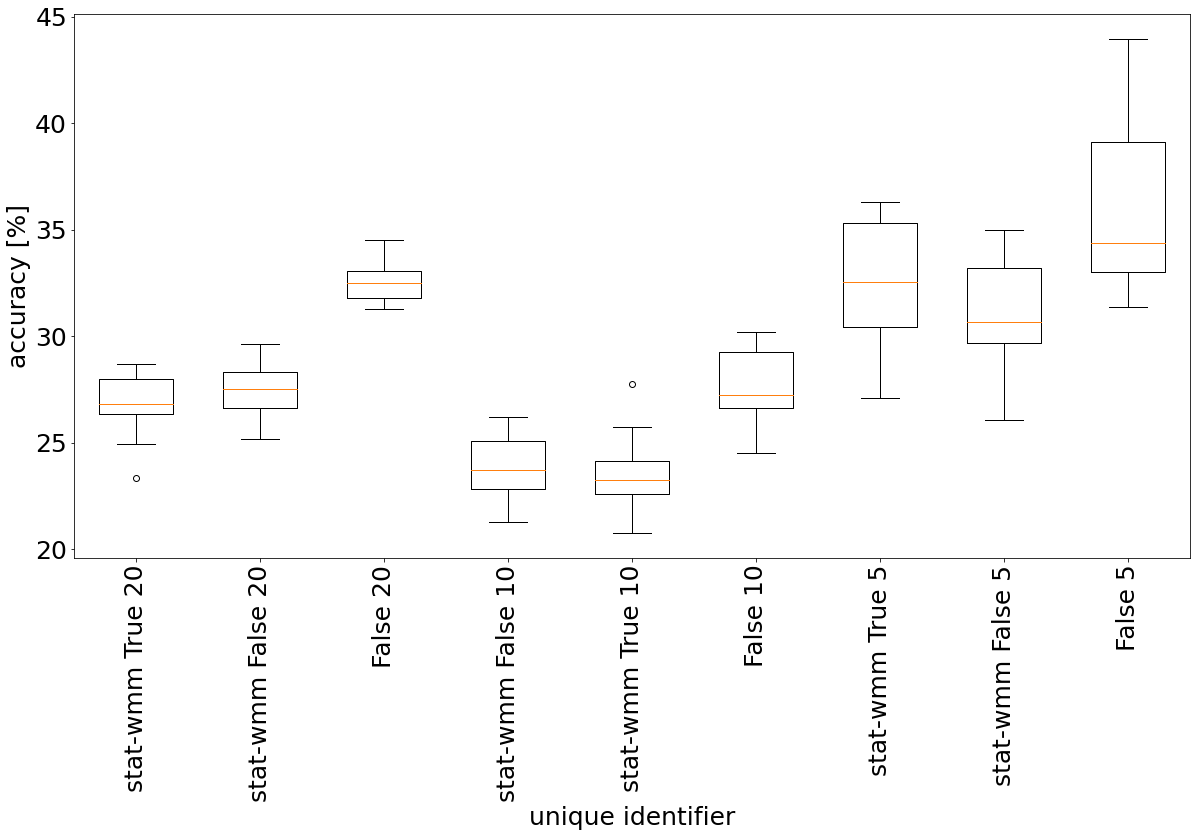

In [27]:
df = viz.metrics_df.copy()

df = df[(df['epochs']=='20') & (df['separate_noise_output']=='None')]

metric= 'mean_acc_at_the_end'
box_plot(metric, df, f"CIFAR100_all_per_task_{metric}_{metric}", 25)
plt.show()

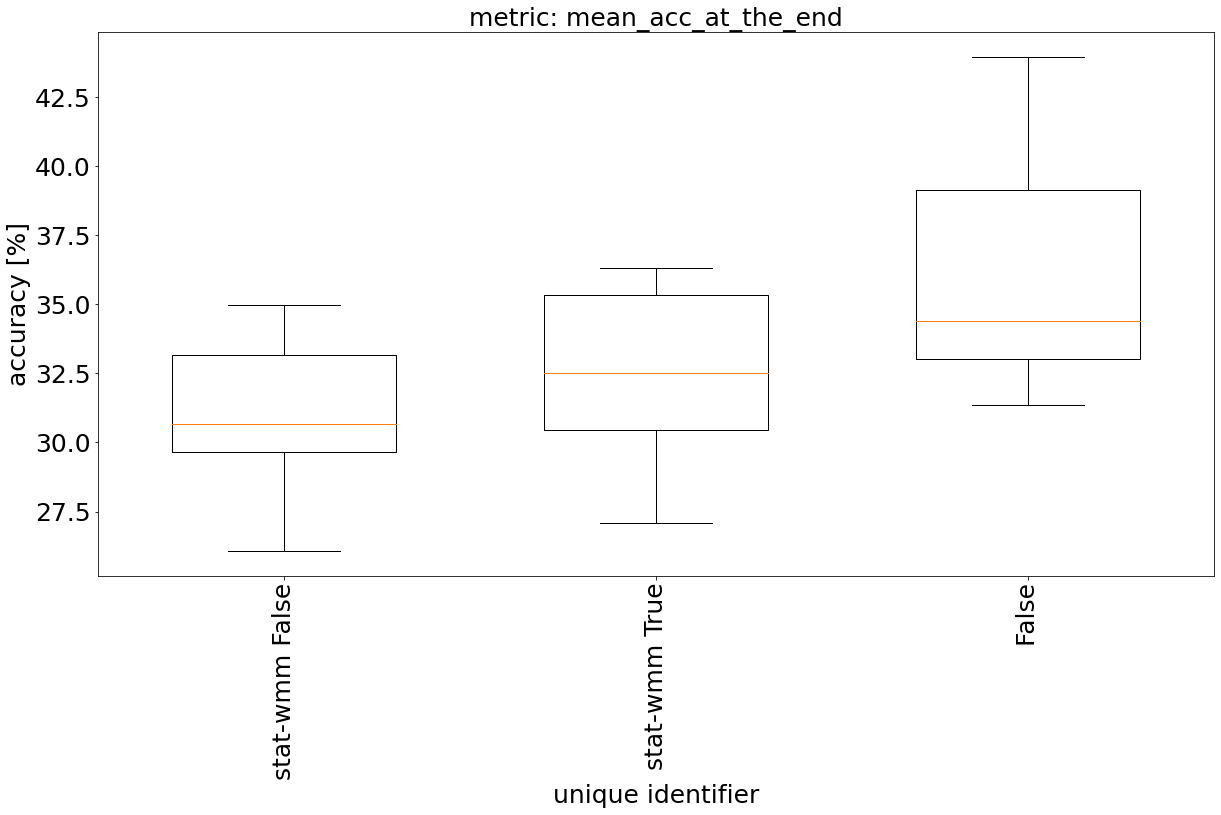

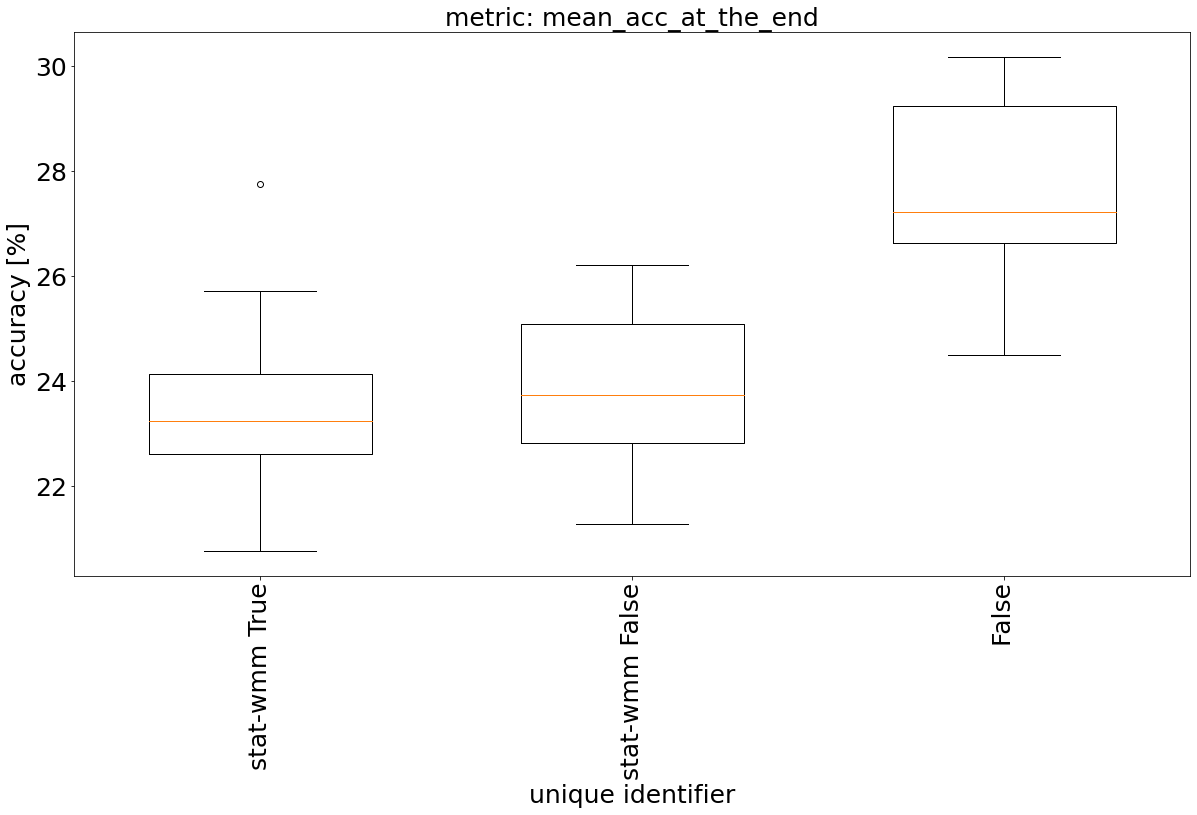

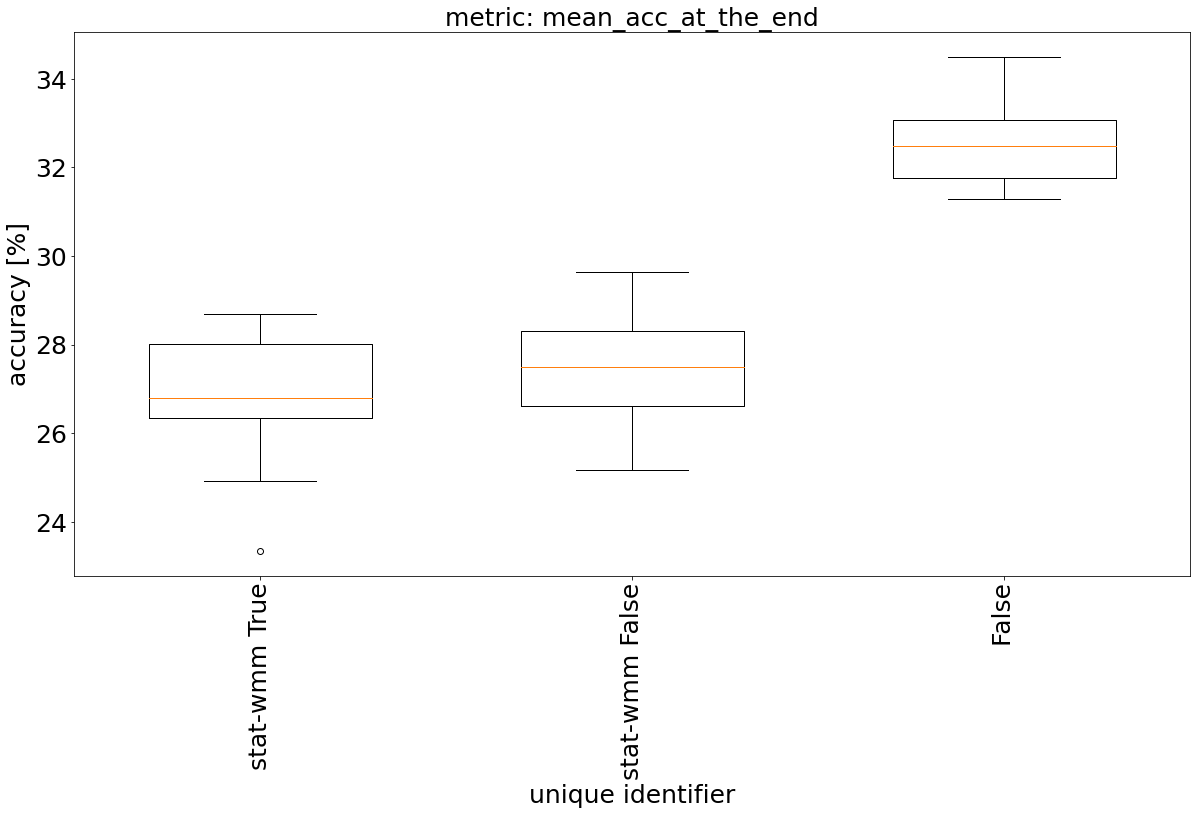

In [6]:

for classes in ['5', '10', '20']:
    df = viz.metrics_df.copy()

    df = df[(df['classes_per_task']==classes) & (df['epochs']=='20') & (df['separate_noise_output']=='None')]

    # metric = 'acc_at_the_end_task_0'
    metric= 'mean_acc_at_the_end'
    box_plot(metric, df, f"CIFAR100_{classes}_per_task_{metric}_{metric}", 25)
    plt.show()

# effect of seperate noisse

In [7]:
df.UID.value_counts()

;128;False;0.003;20;20;None;            10
stat-wmm;128;False;0.003;20;20;None;    10
stat-wmm;128;True;0.003;20;20;None;     10
Name: UID, dtype: int64

In [8]:
list(viz.runs_params_settings_idxs_dict.keys())

['stat-wmm;128;True;0.003;20;20;True',
 'stat-wmm;128;True;0.003;40;5;None',
 'stat-wmm;128;True;0.003;40;10;None',
 'stat-wmm;128;True;0.003;40;20;None',
 ';128;False;0.003;20;5;None',
 ';128;False;0.003;20;10;None',
 ';128;False;0.003;20;20;None',
 'stat-wmm;128;False;0.003;20;20;None',
 'stat-wmm;128;True;0.003;20;20;None',
 'stat-wmm;128;True;0.003;20;10;None',
 'stat-wmm;128;False;0.003;20;10;None',
 'stat-wmm;128;False;0.003;20;5;None',
 'stat-wmm;128;True;0.003;20;5;None']

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &            0.80 &      9.40 &               6.36 &  test \\
    1 &            2.30 &     12.30 &               8.33 &  test \\
    2 &            5.11 &     15.08 &              10.25 &  test \\
    3 &           11.20 &     19.47 &              15.40 &  test \\
    4 &           27.43 &     23.10 &               0.00 &  test \\
\bottomrule
\end{tabular}



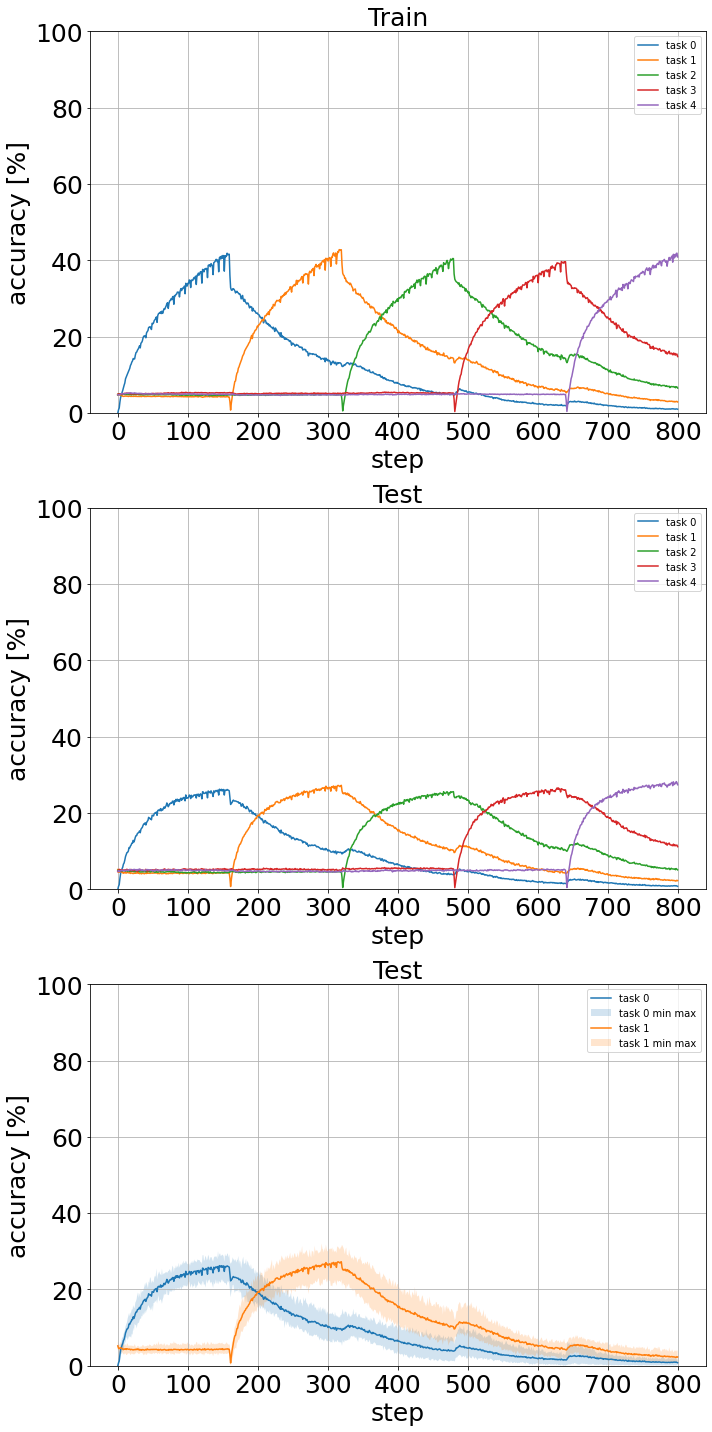

In [9]:
viz.plot_single_setting_aggregated('stat-wmm;128;True;0.003;20;20;True', fontsize=25, filename="CIFAR100_sep_noise", layout='vertical')

In [10]:
'stat-wmm;128;False;0.003;20;5;None'
'stat-wmm;128;True;0.003;20;5;None'

'stat-wmm;128;True;0.003;20;5;None'

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           30.56 &     41.57 &               6.86 &  test \\
    1 &           31.42 &     40.96 &              10.43 &  test \\
    2 &           34.20 &     39.67 &              14.81 &  test \\
    3 &           32.74 &     37.35 &              30.32 &  test \\
    4 &           33.70 &     34.10 &               0.00 &  test \\
\bottomrule
\end{tabular}



c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           28.16 &     39.46 &               7.37 &  test \\
    1 &           31.06 &     38.48 &               9.51 &  test \\
    2 &           34.04 &     39.49 &              13.14 &  test \\
    3 &           30.60 &     36.96 &              27.88 &  test \\
    4 &           31.40 &     33.51 &               0.00 &  test \\
\bottomrule
\end{tabular}



c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           33.76 &     44.13 &               8.01 &  test \\
    1 &           36.50 &     45.41 &              10.90 &  test \\
    2 &           34.70 &     39.70 &              14.93 &  test \\
    3 &           38.52 &     44.11 &              31.58 &  test \\
    4 &           36.52 &     38.32 &               0.00 &  test \\
\bottomrule
\end{tabular}



c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           22.11 &     33.08 &               7.16 &  test \\
    1 &           19.03 &     28.85 &               9.31 &  test \\
    2 &           23.21 &     31.91 &              14.01 &  test \\
    3 &           24.24 &     29.82 &              25.84 &  test \\
    4 &           29.20 &     32.41 &               0.00 &  test \\
\bottomrule
\end{tabular}



c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           20.61 &     31.75 &               7.42 &  test \\
    1 &           21.41 &     31.78 &               9.65 &  test \\
    2 &           23.35 &     30.73 &              12.74 &  test \\
    3 &           26.35 &     31.40 &              23.21 &  test \\
    4 &           27.84 &     30.49 &               0.00 &  test \\
\bottomrule
\end{tabular}



c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           22.88 &     34.17 &               8.26 &  test \\
    1 &           24.41 &     34.53 &              10.76 &  test \\
    2 &           27.28 &     35.98 &              16.47 &  test \\
    3 &           29.72 &     34.41 &              27.83 &  test \\
    4 &           33.75 &     35.65 &               0.00 &  test \\
\bottomrule
\end{tabular}



c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           17.77 &     26.59 &               5.12 &  test \\
    1 &           20.34 &     29.23 &               6.32 &  test \\
    2 &           24.74 &     32.97 &               8.03 &  test \\
    3 &           31.21 &     35.71 &               9.33 &  test \\
    4 &           39.77 &     37.40 &               0.00 &  test \\
\bottomrule
\end{tabular}



c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           18.02 &     27.86 &               5.29 &  test \\
    1 &           20.64 &     29.77 &               6.37 &  test \\
    2 &           26.23 &     34.34 &               7.97 &  test \\
    3 &           31.50 &     35.96 &               9.19 &  test \\
    4 &           41.25 &     38.52 &               0.00 &  test \\
\bottomrule
\end{tabular}



c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           21.19 &     31.65 &               6.44 &  test \\
    1 &           23.17 &     34.17 &               7.69 &  test \\
    2 &           30.00 &     38.23 &               8.61 &  test \\
    3 &           40.00 &     43.87 &               9.42 &  test \\
    4 &           48.66 &     45.23 &               0.00 &  test \\
\bottomrule
\end{tabular}



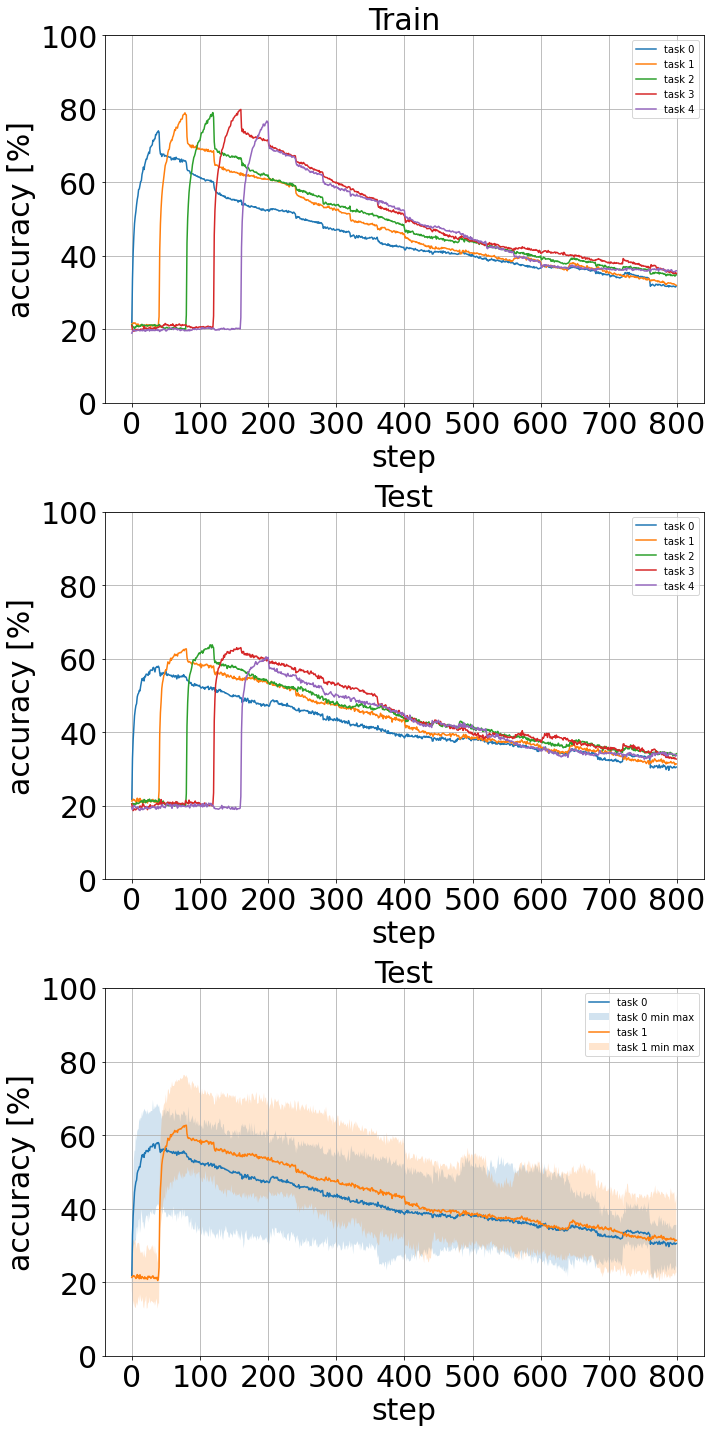

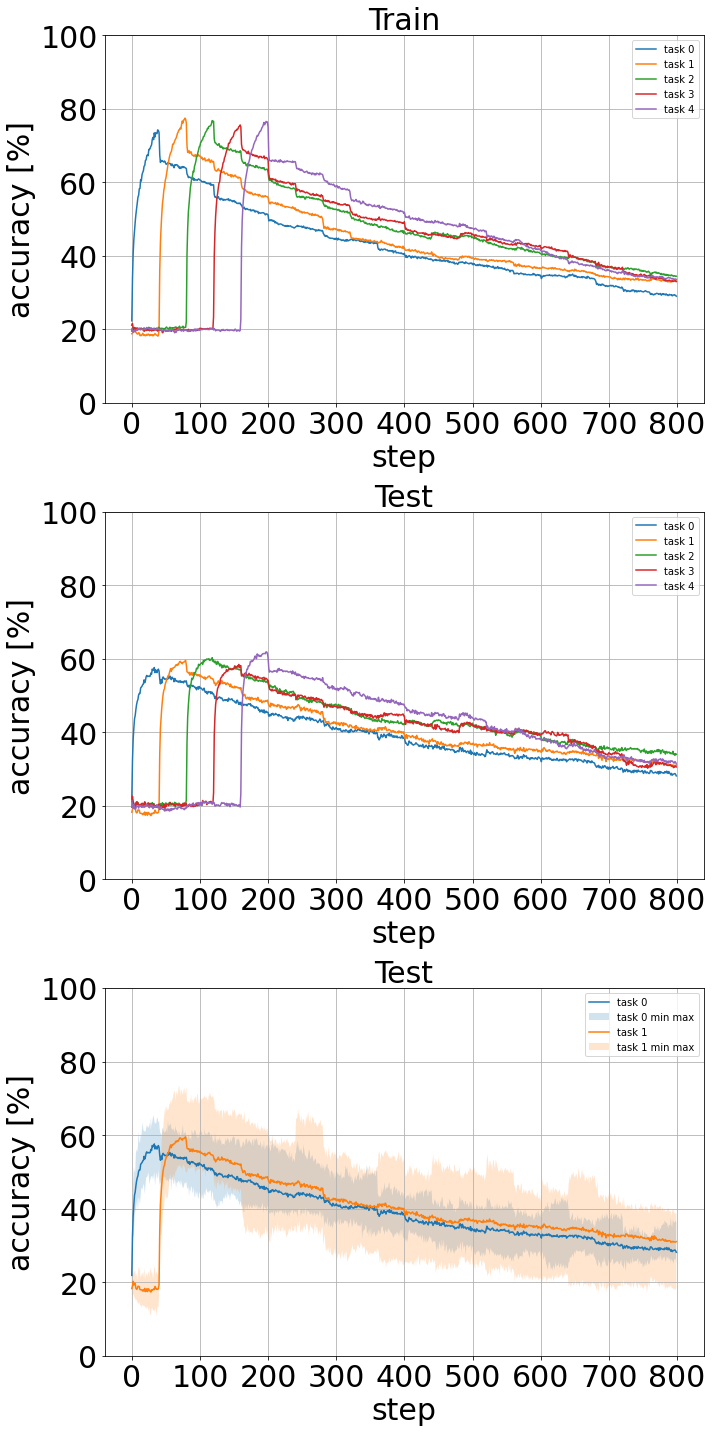

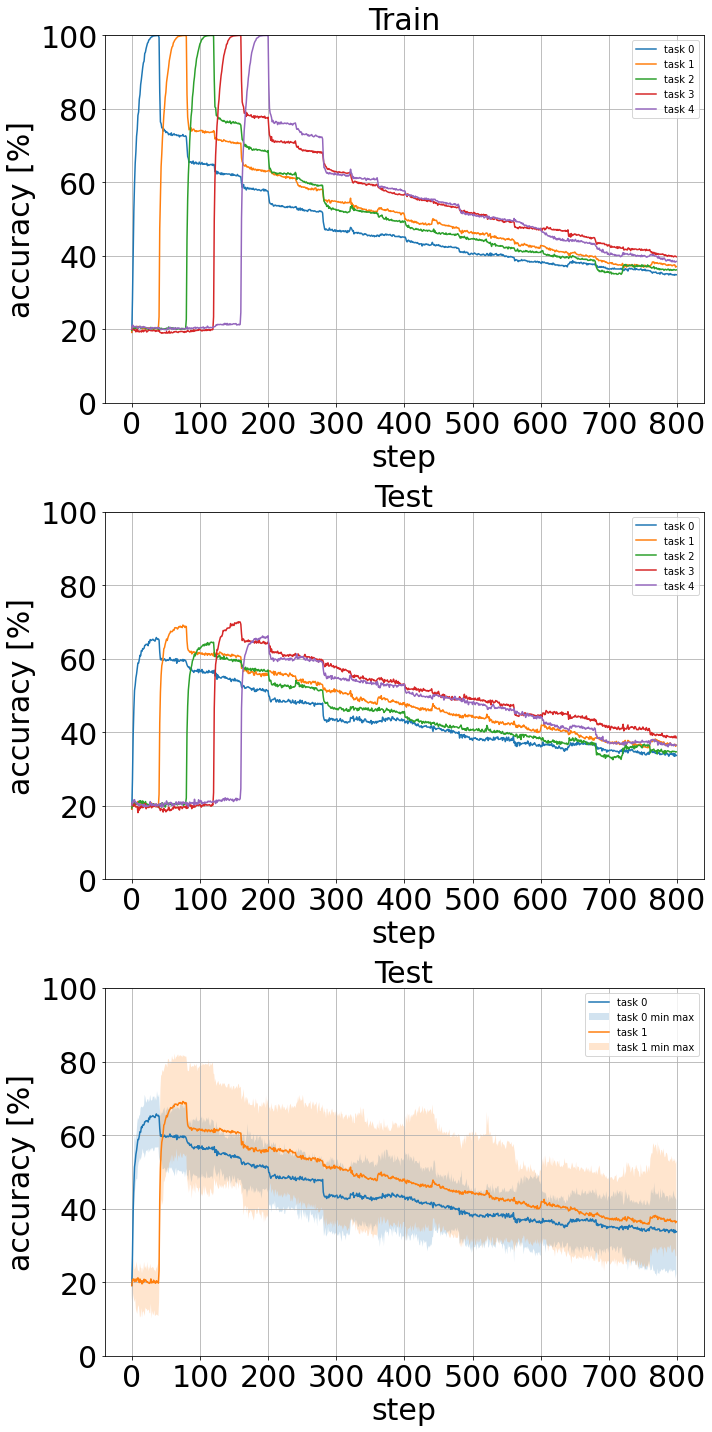

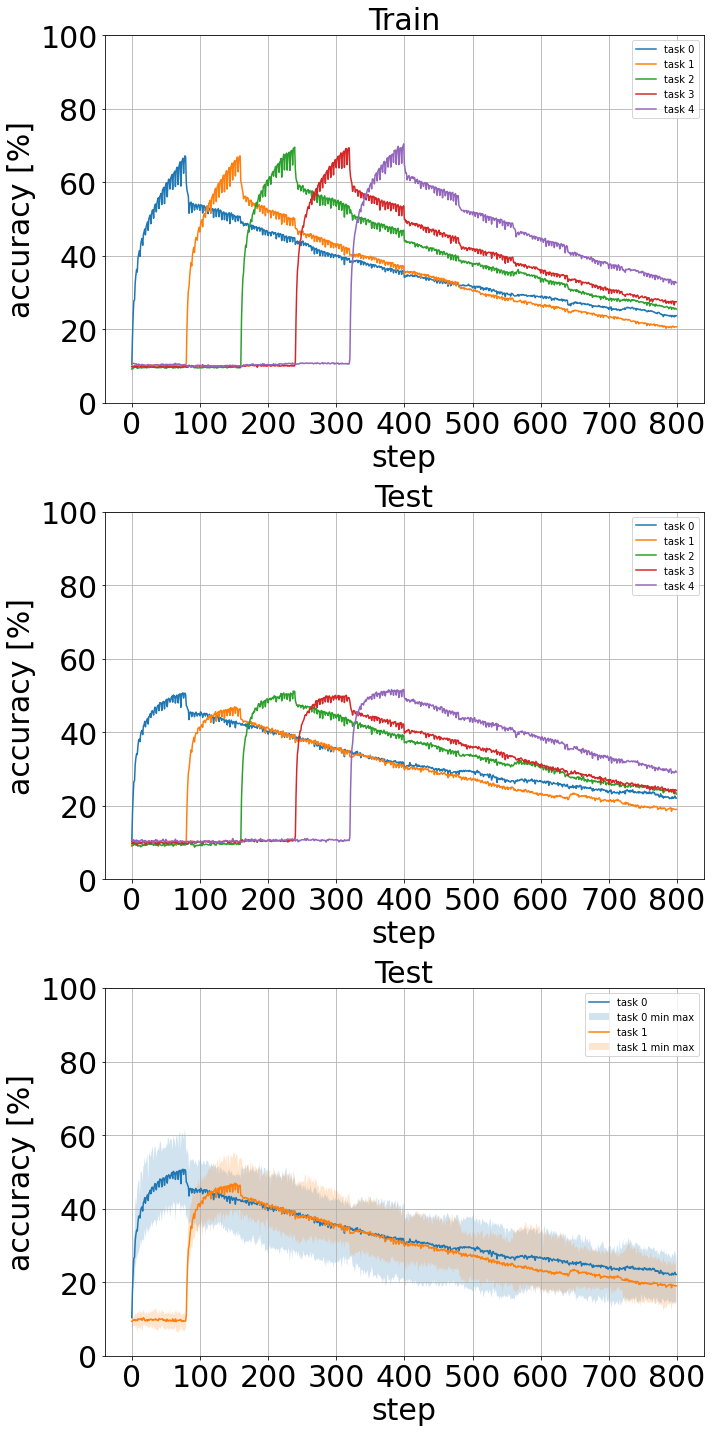

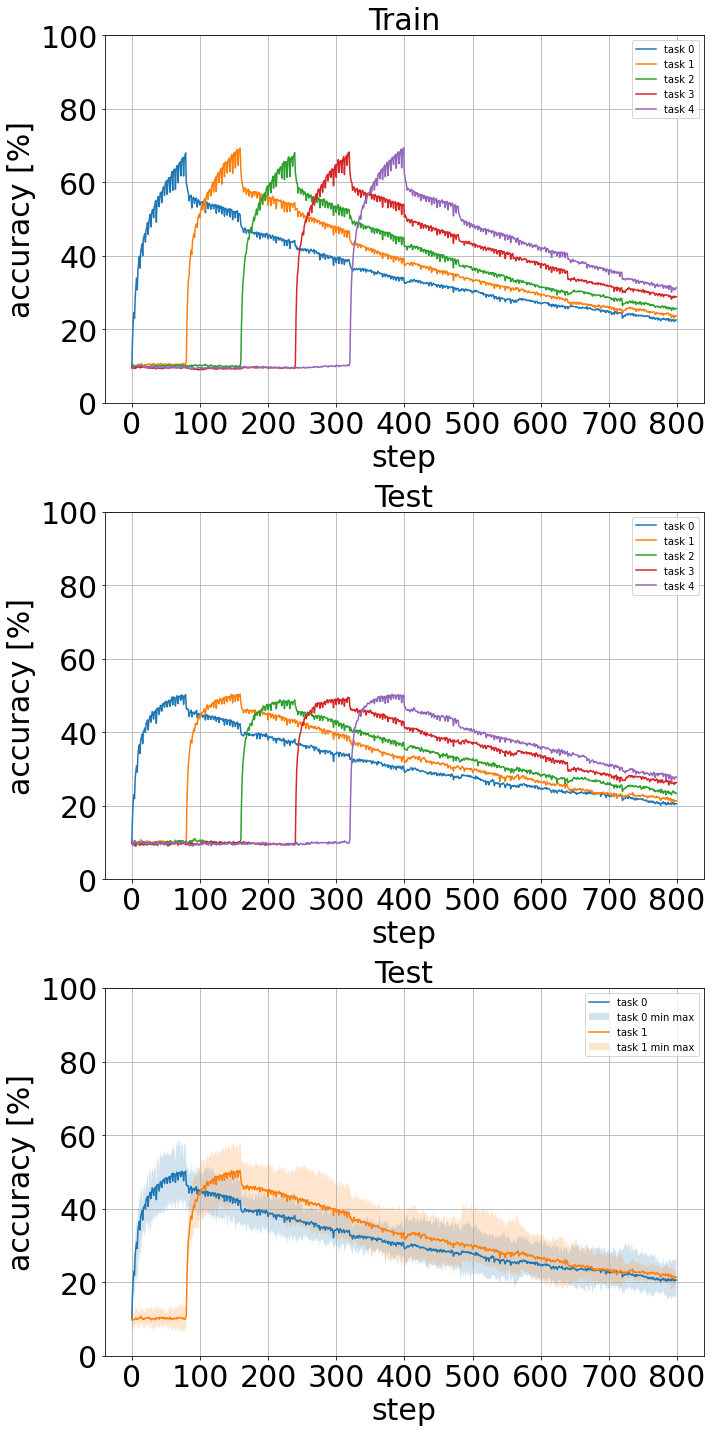

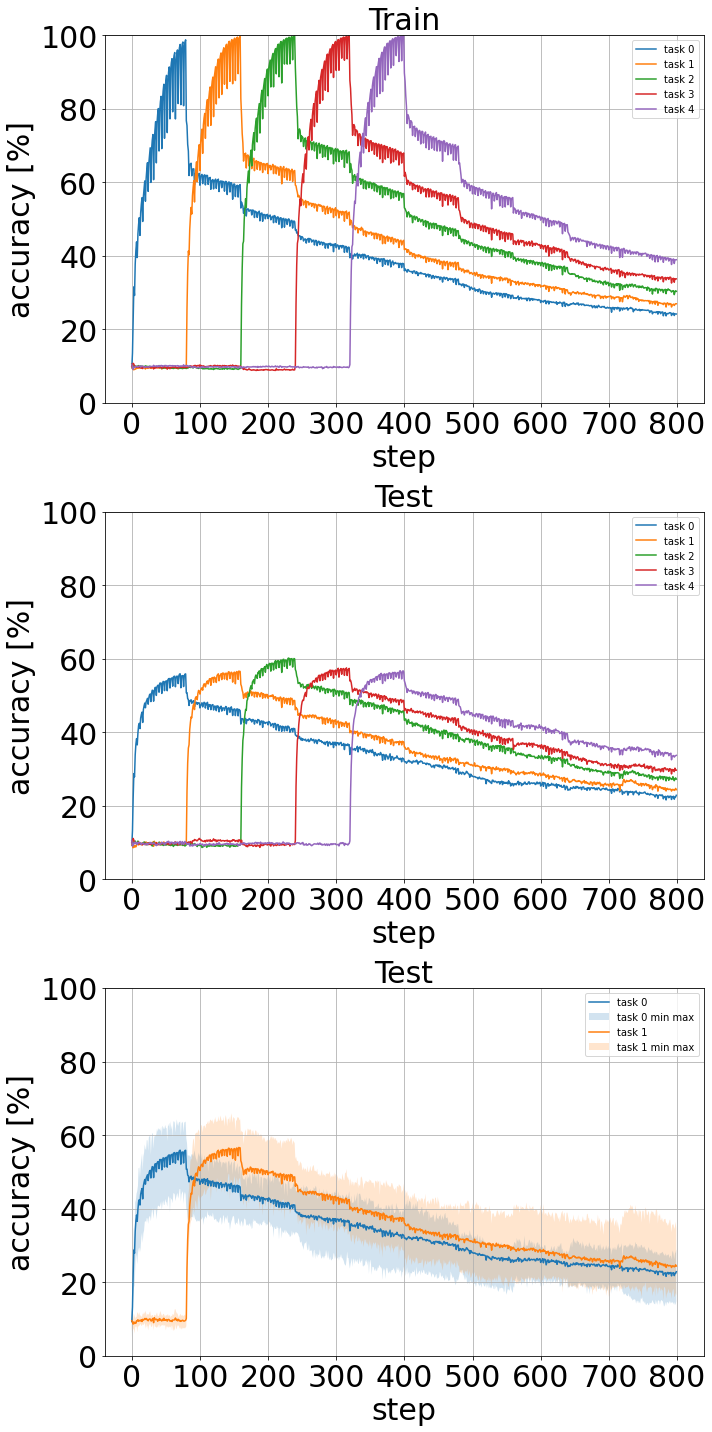

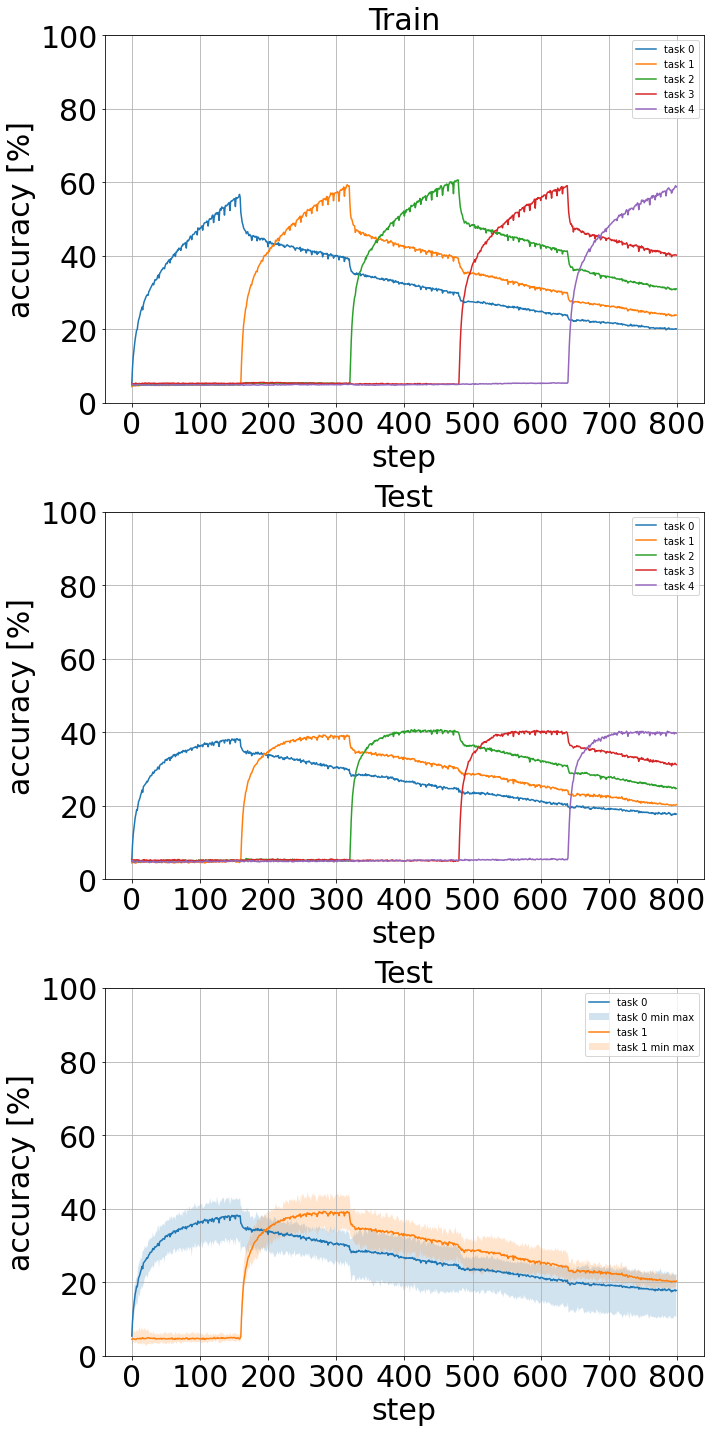

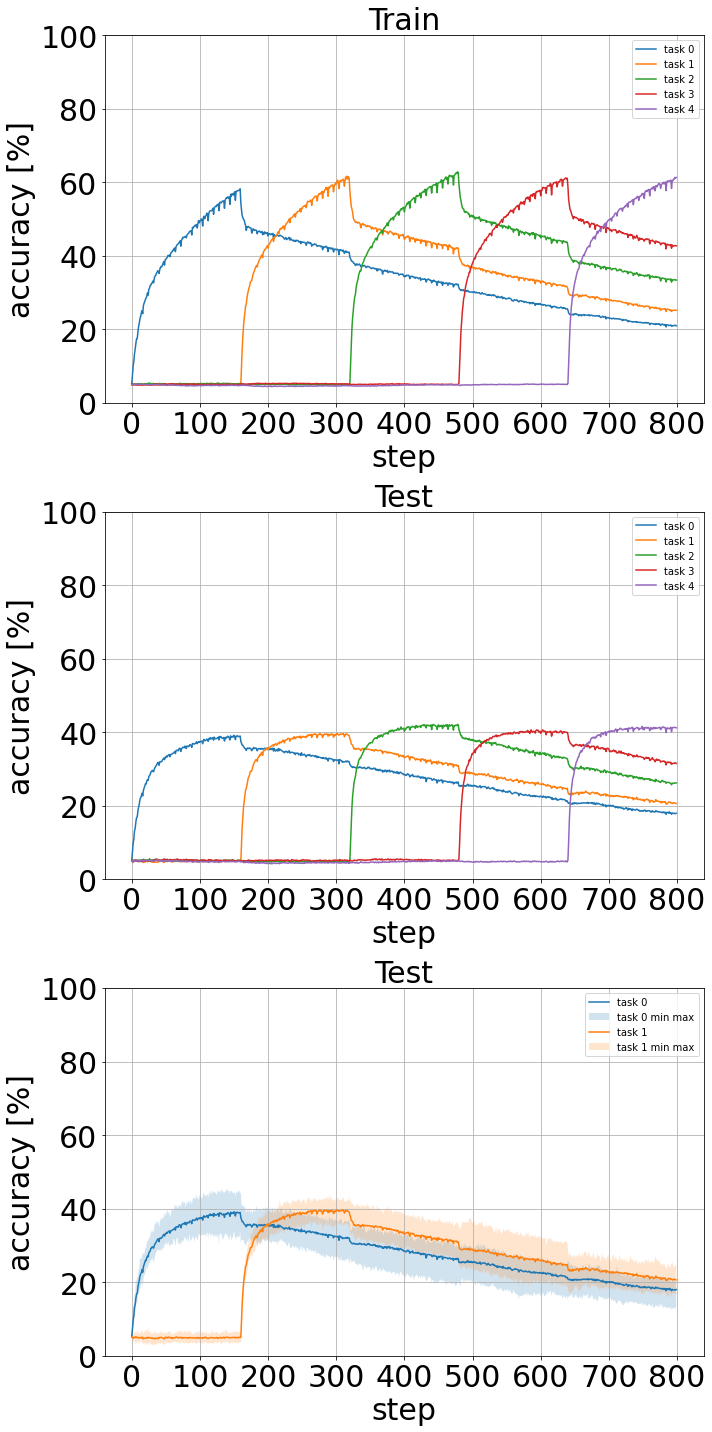

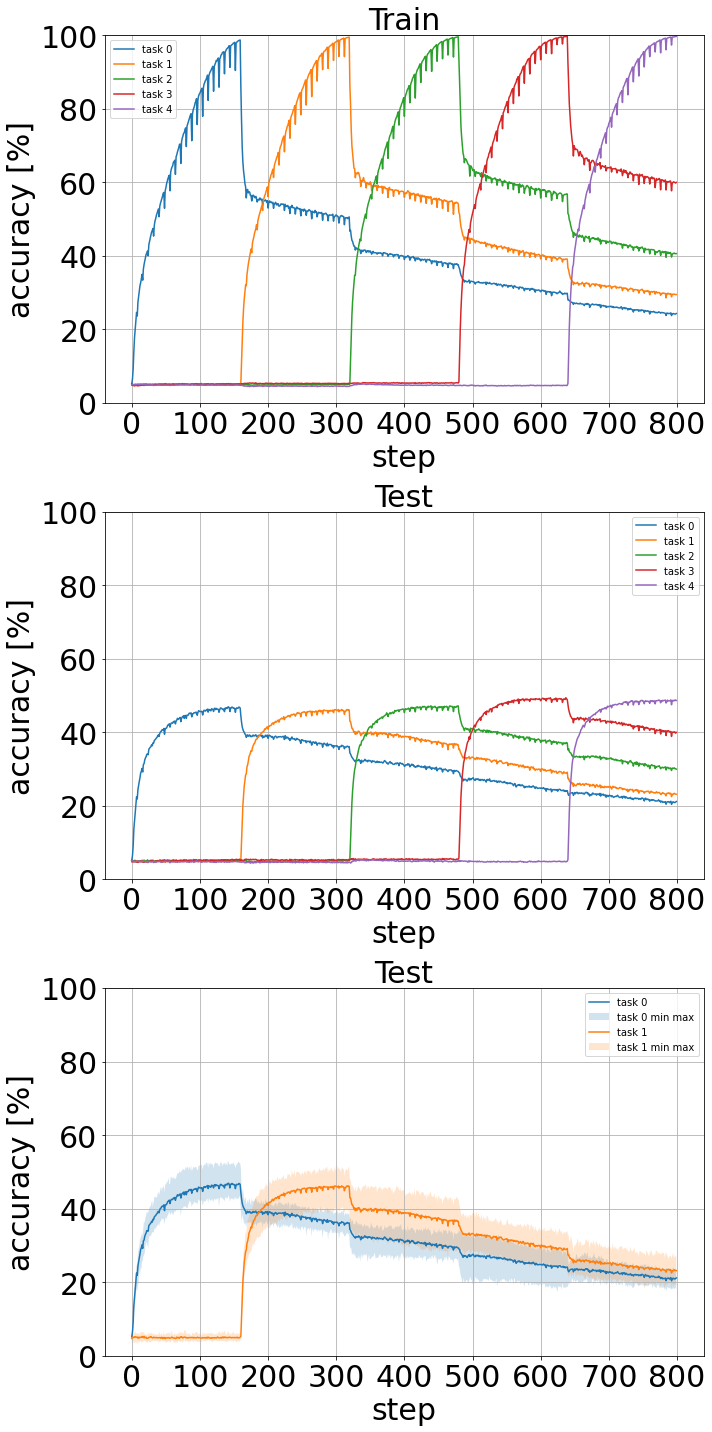

In [11]:
for classes in ['5', '10', '20']:
    viz.plot_single_setting_aggregated(f'stat-wmm;128;True;0.003;20;{classes};None', fontsize=30, filename=f"CIFAR100_{classes}_classes_reh_true", layout='vertical')
    viz.plot_single_setting_aggregated(f'stat-wmm;128;False;0.003;20;{classes};None', fontsize=30, filename=f"CIFAR100_{classes}_classes_reh_false", layout='vertical')
    viz.plot_single_setting_aggregated(f';128;False;0.003;20;{classes};None', fontsize=30, filename=f"CIFAR100_{classes}_classes_no_reh", layout='vertical')

# All runs

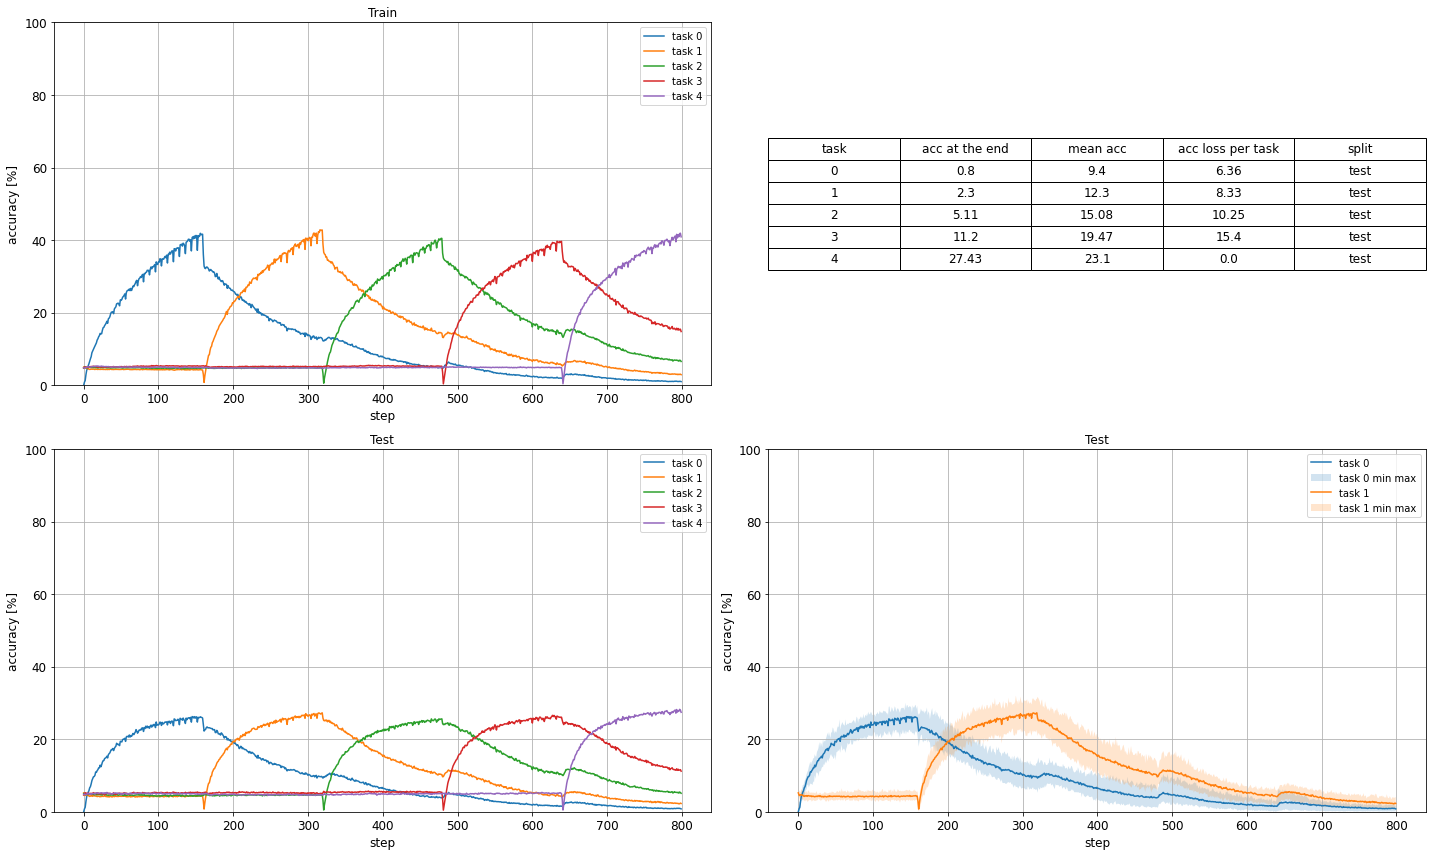

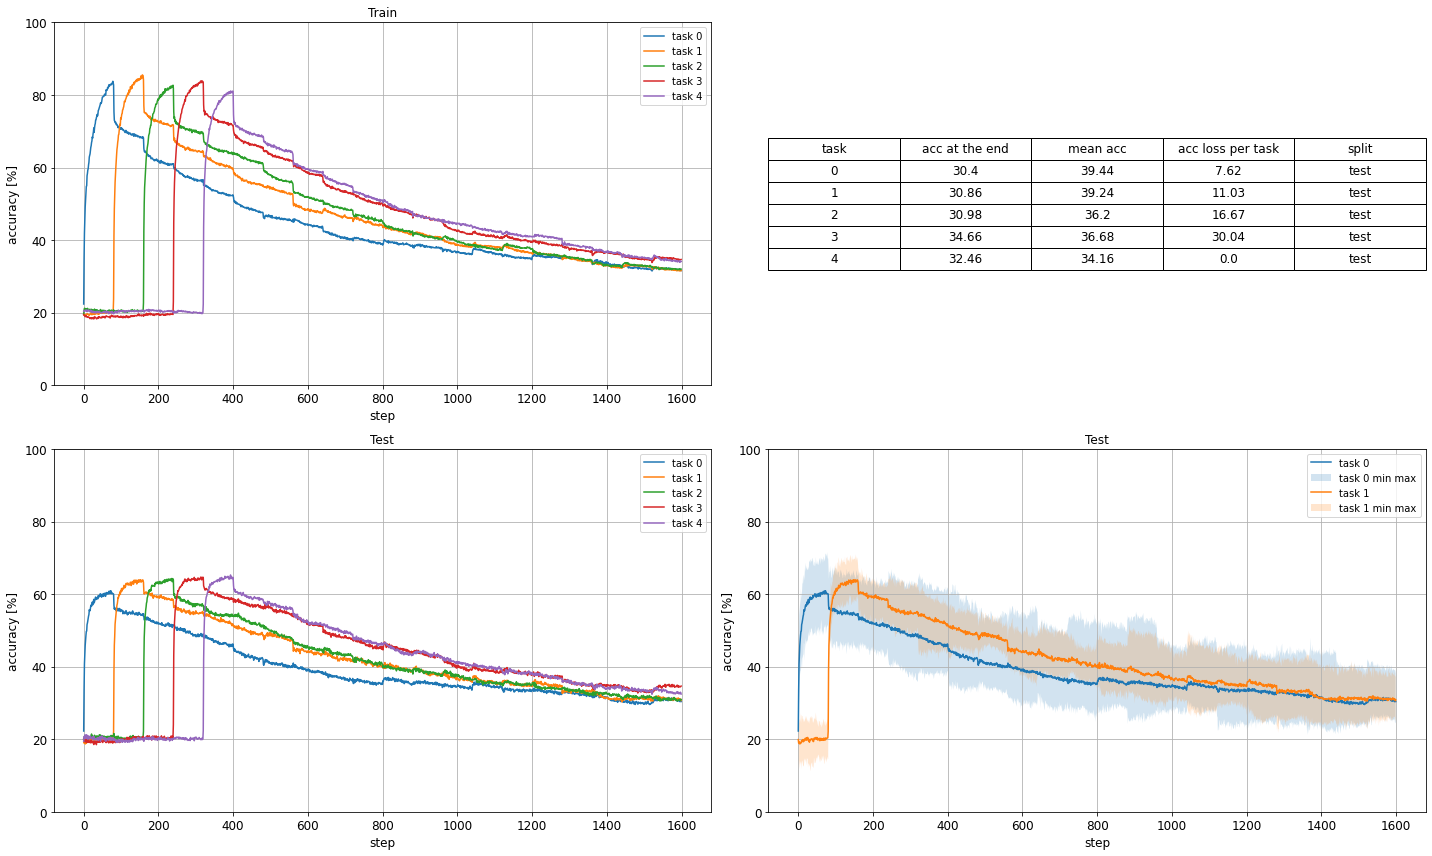

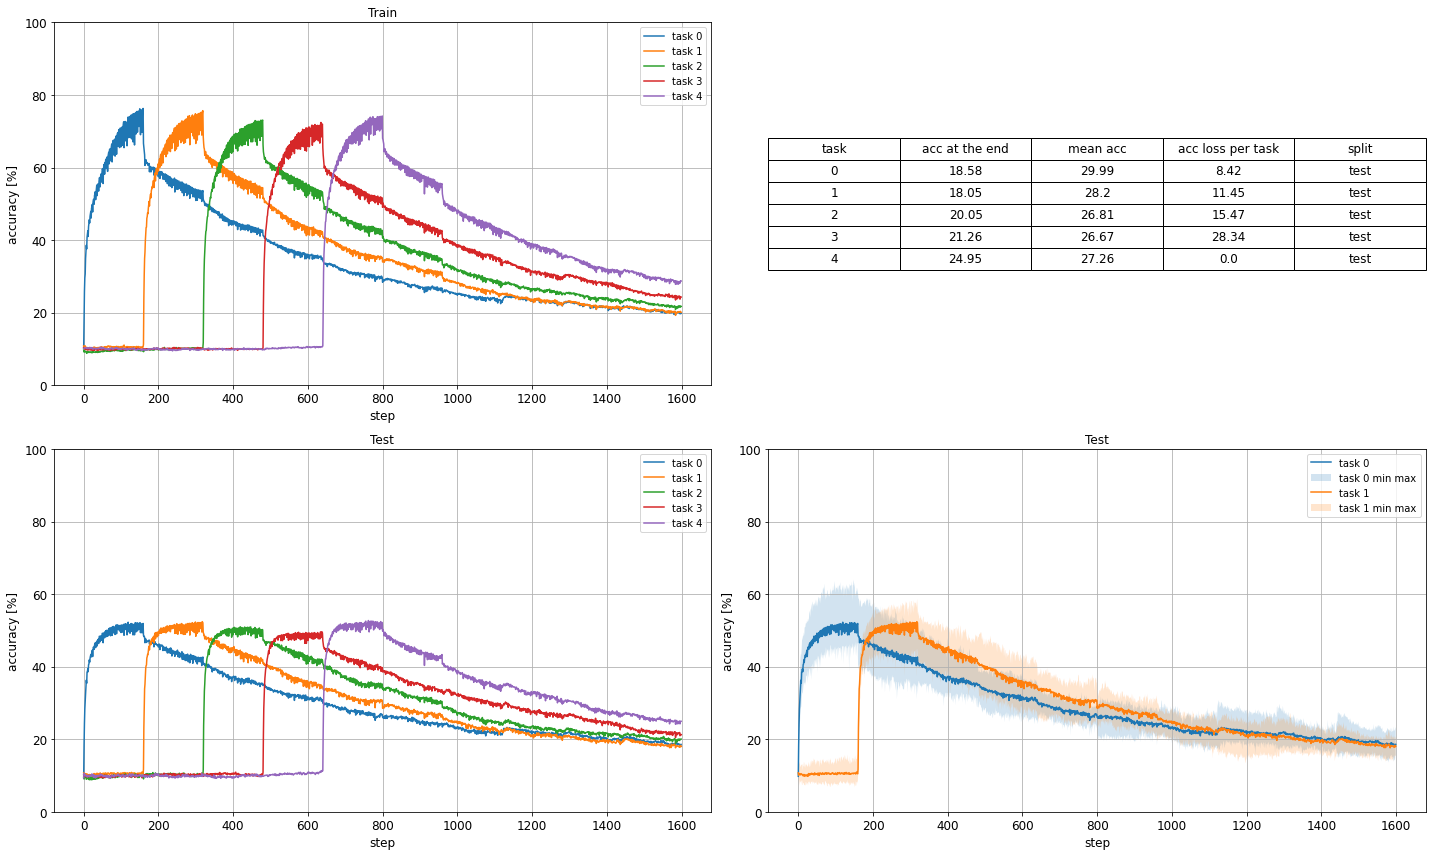

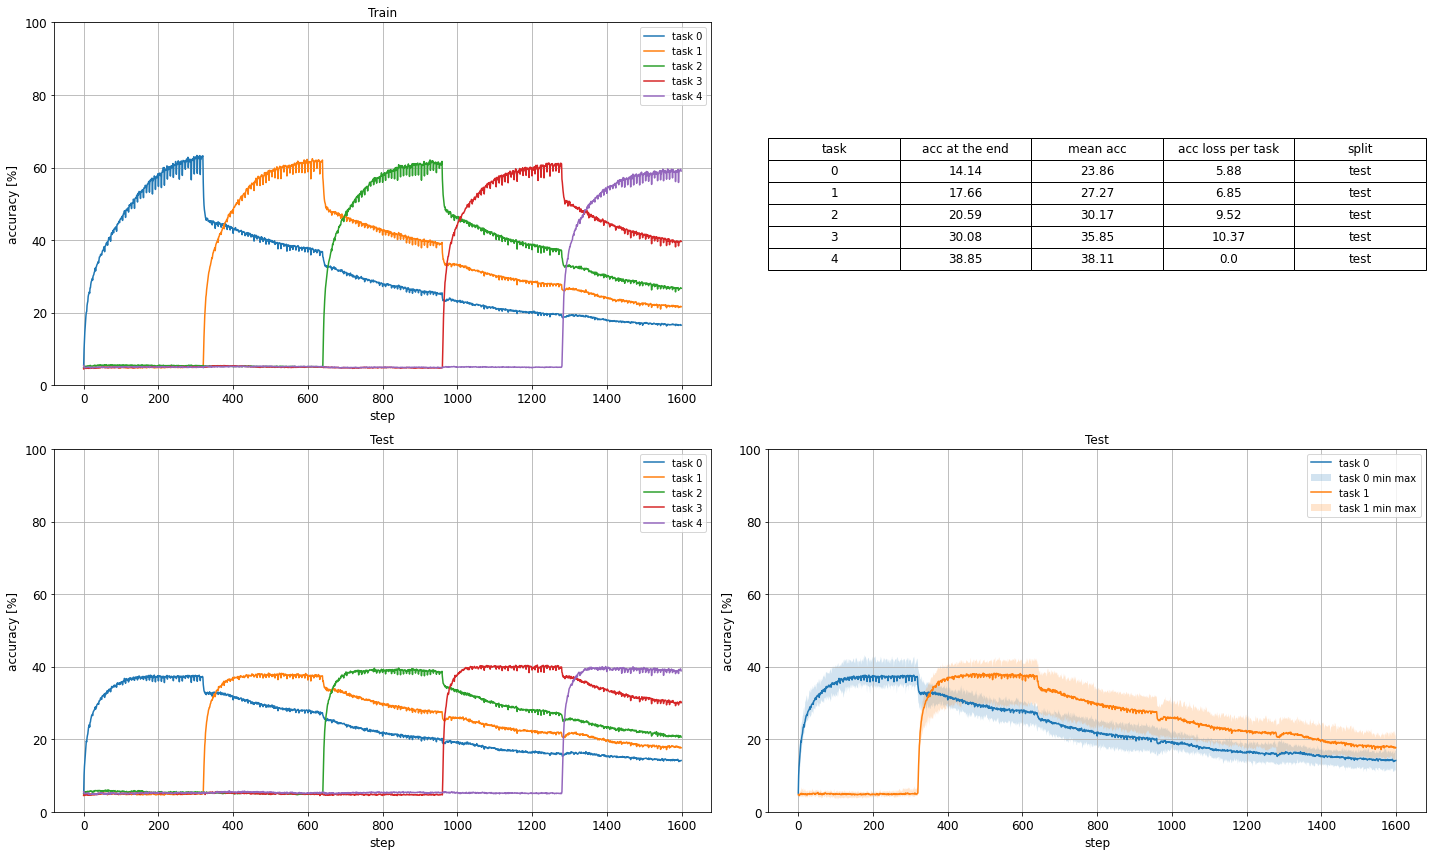

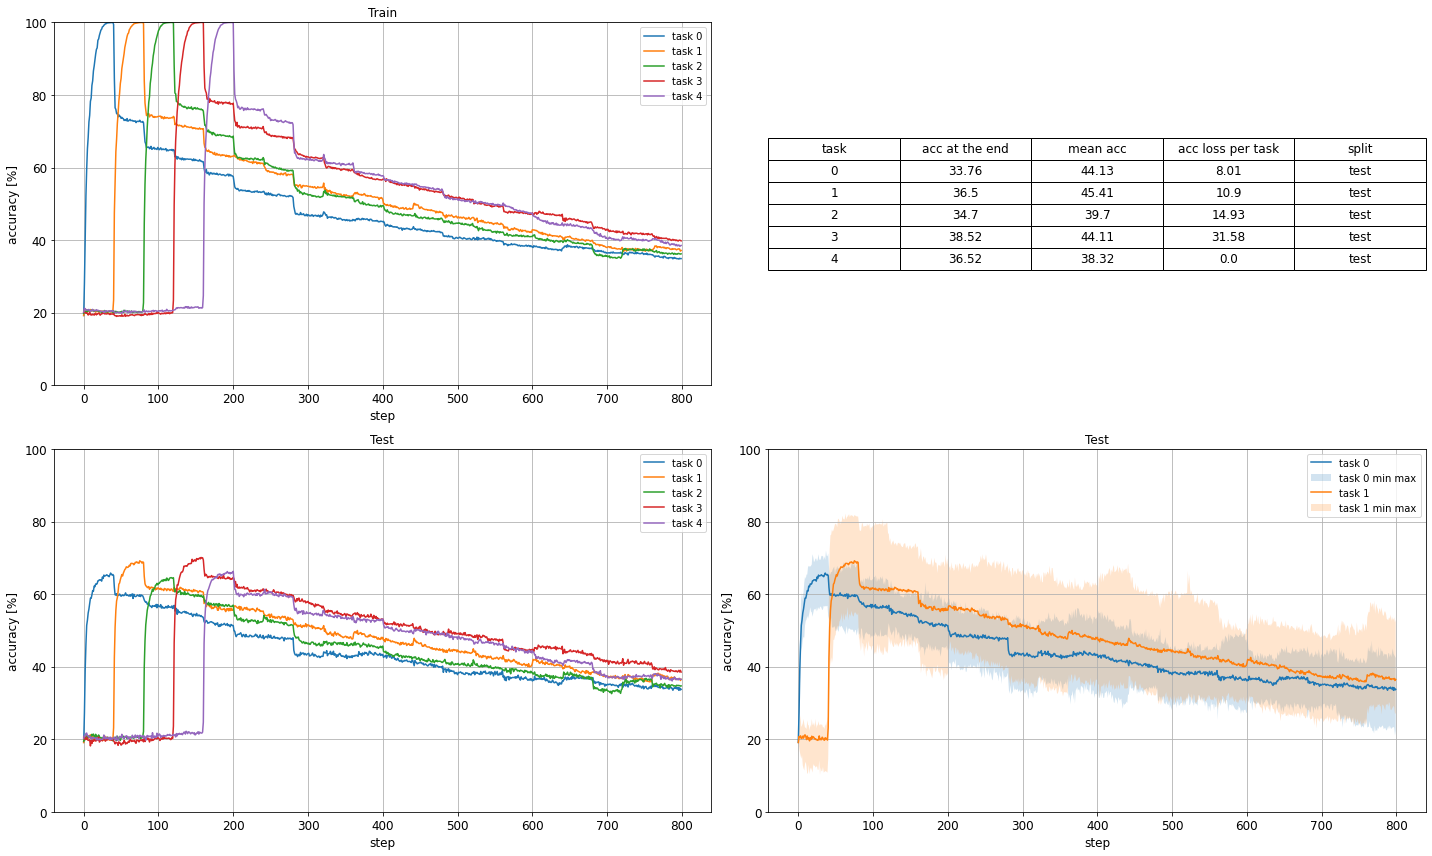

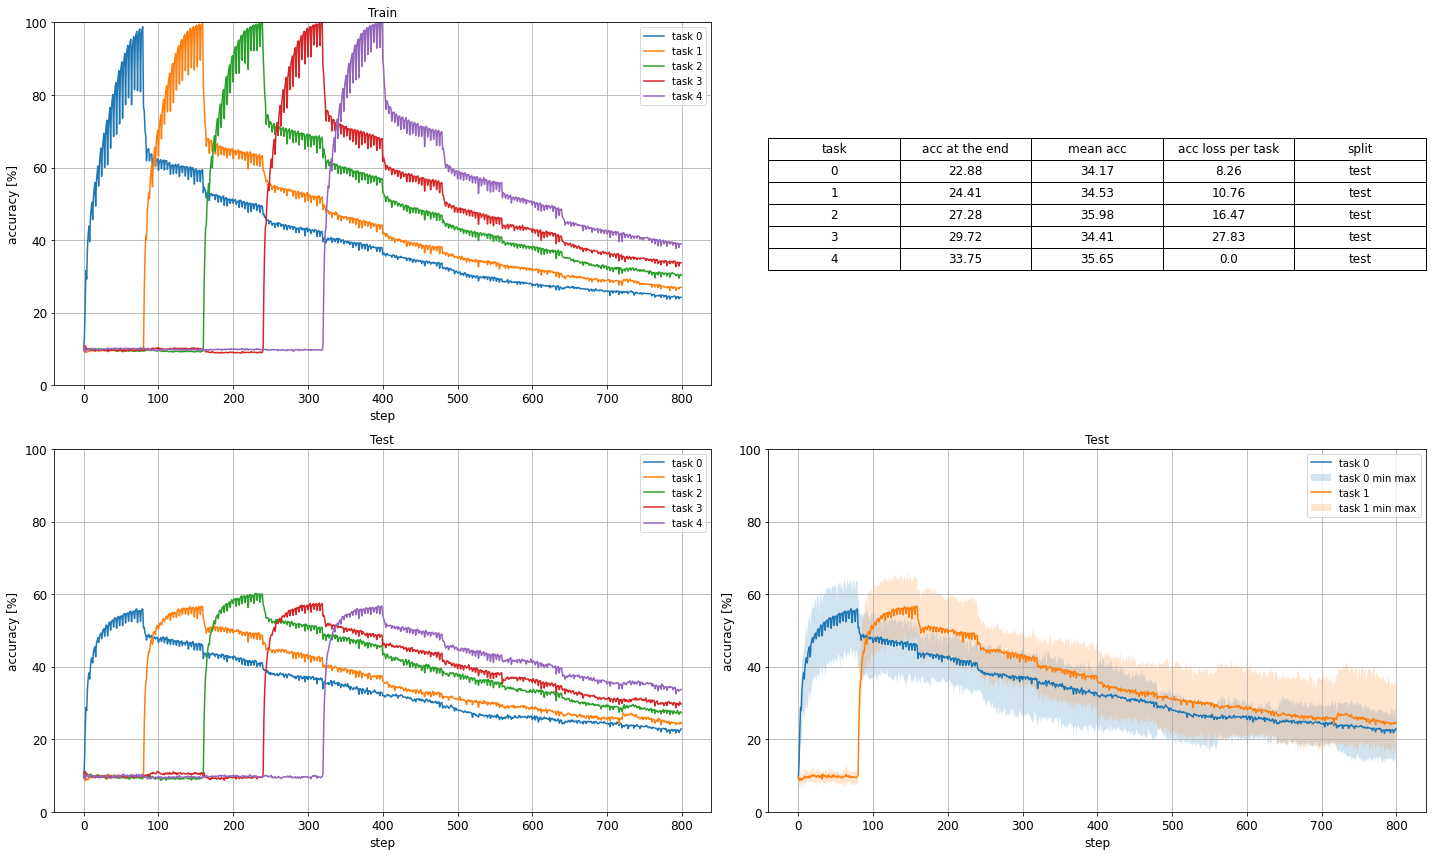

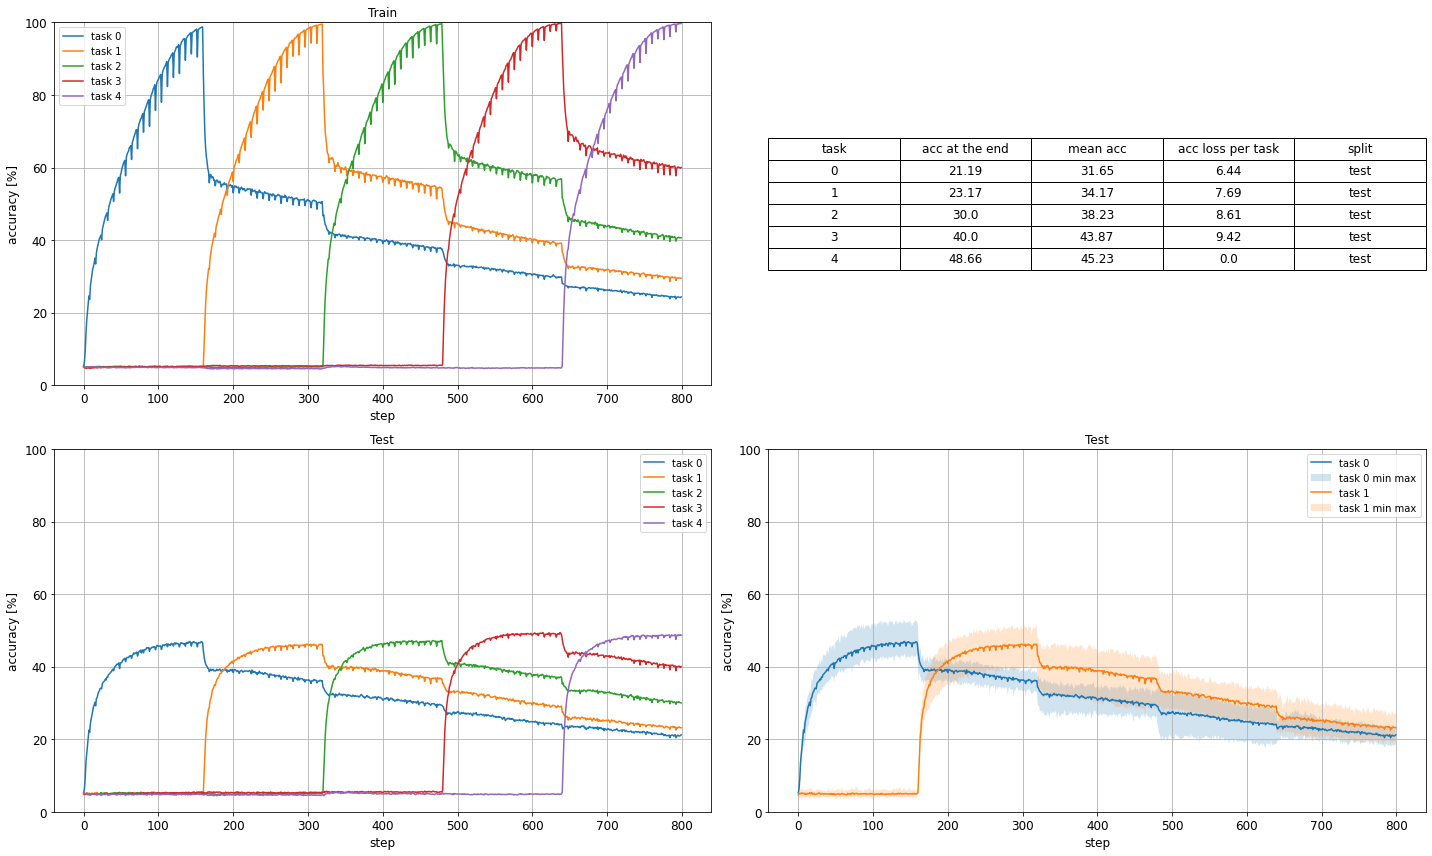

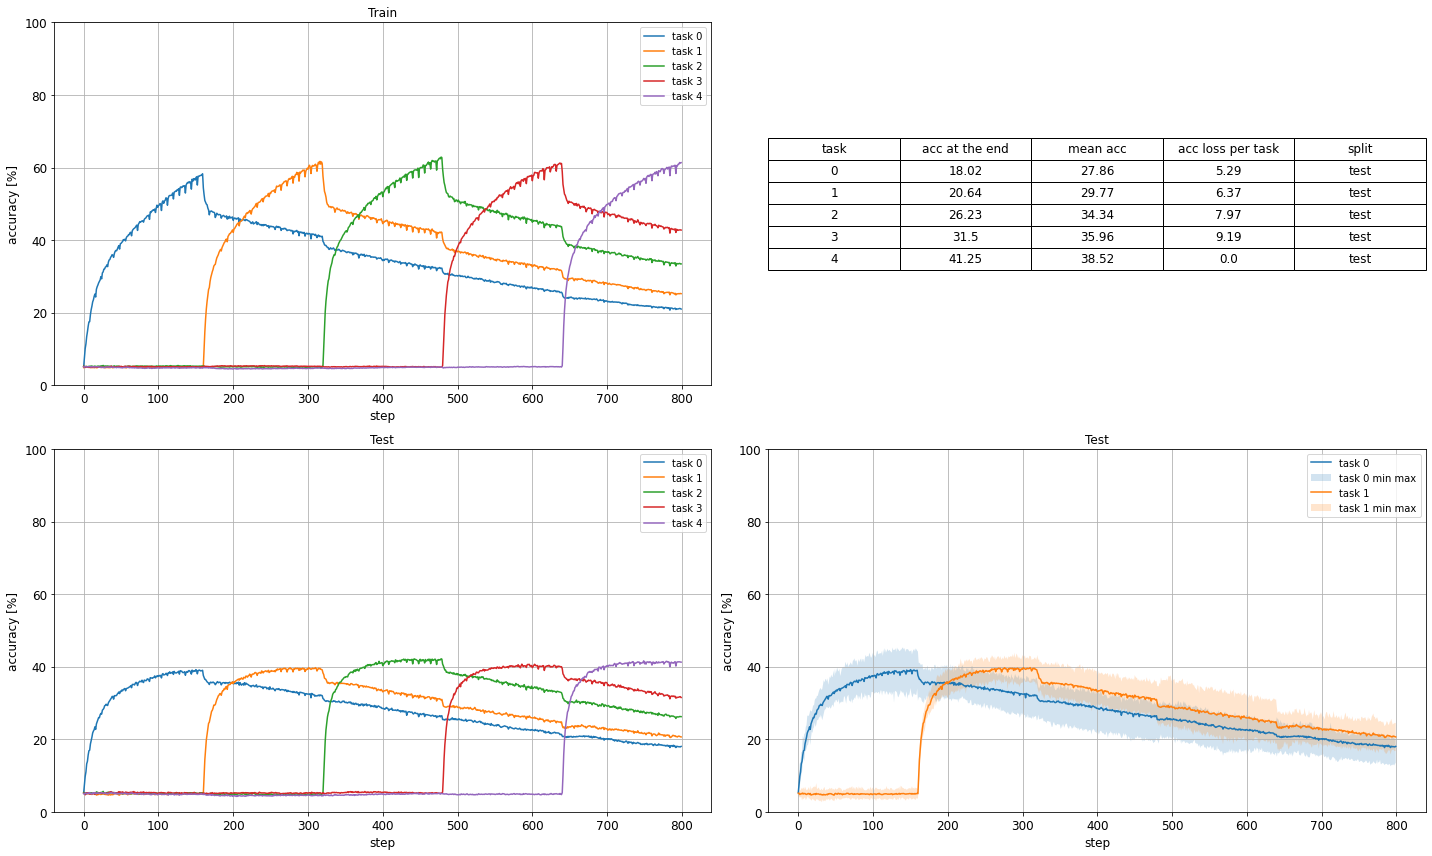

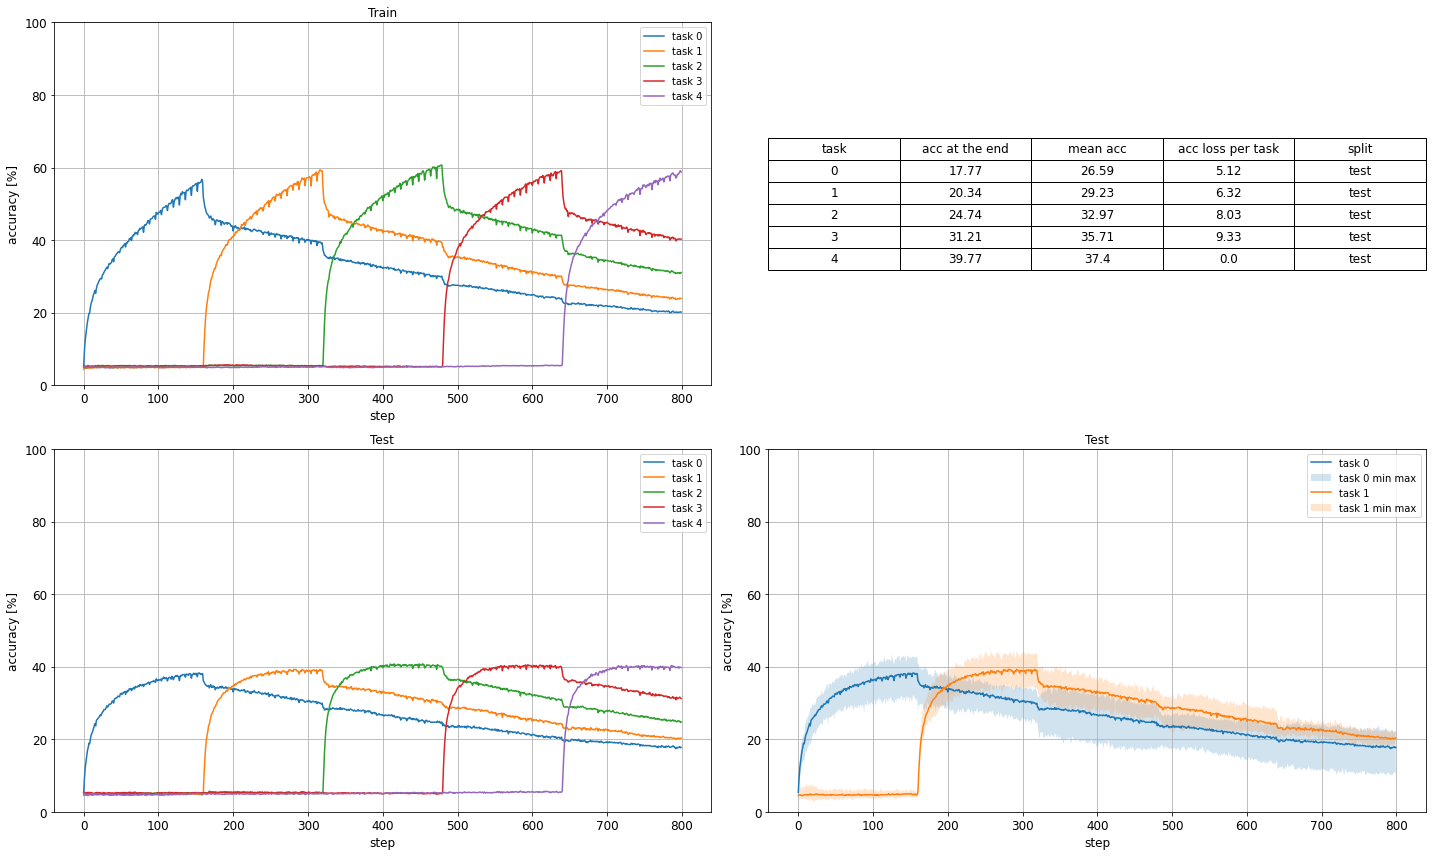

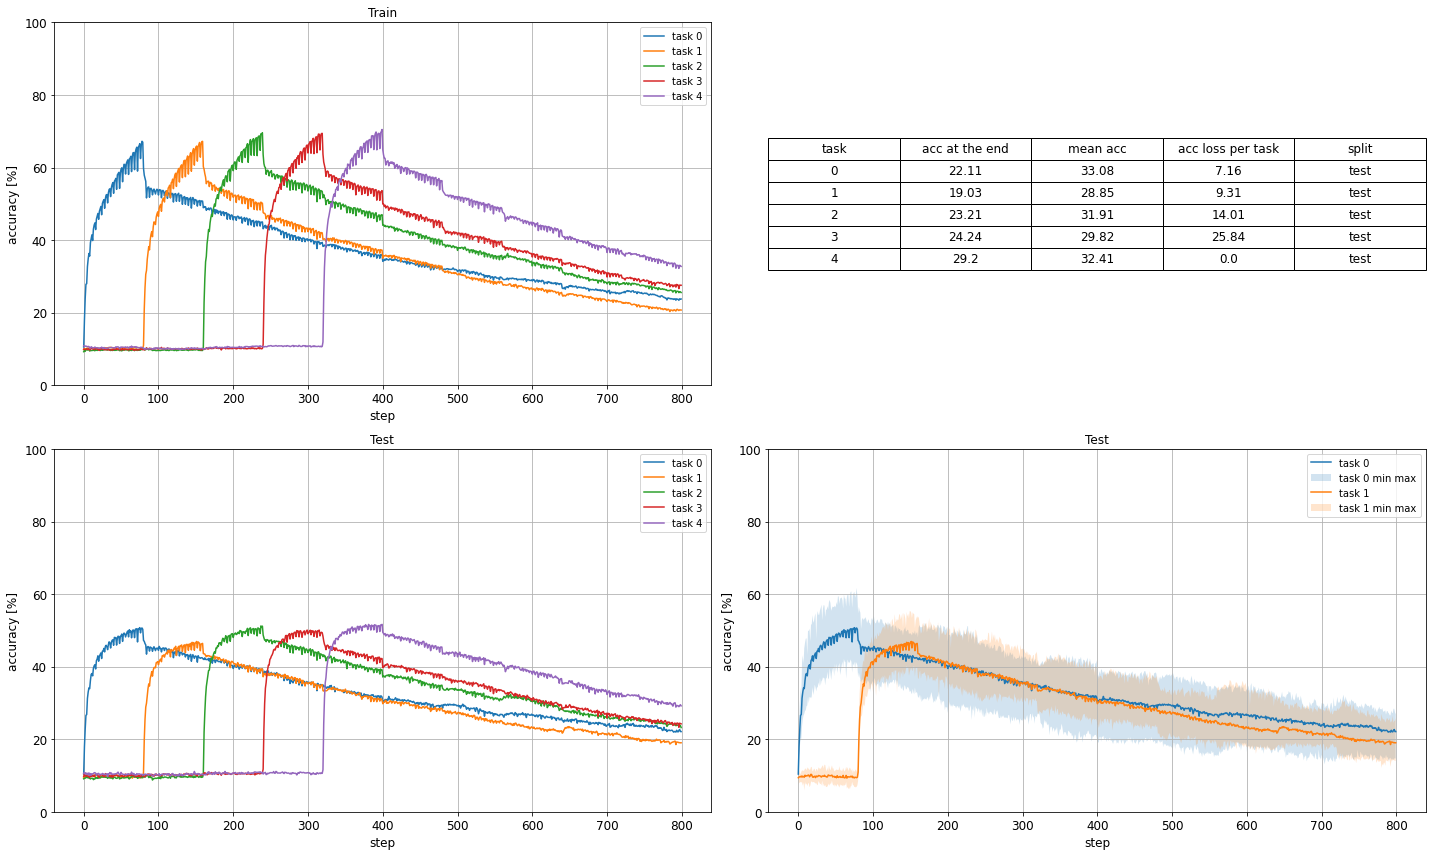

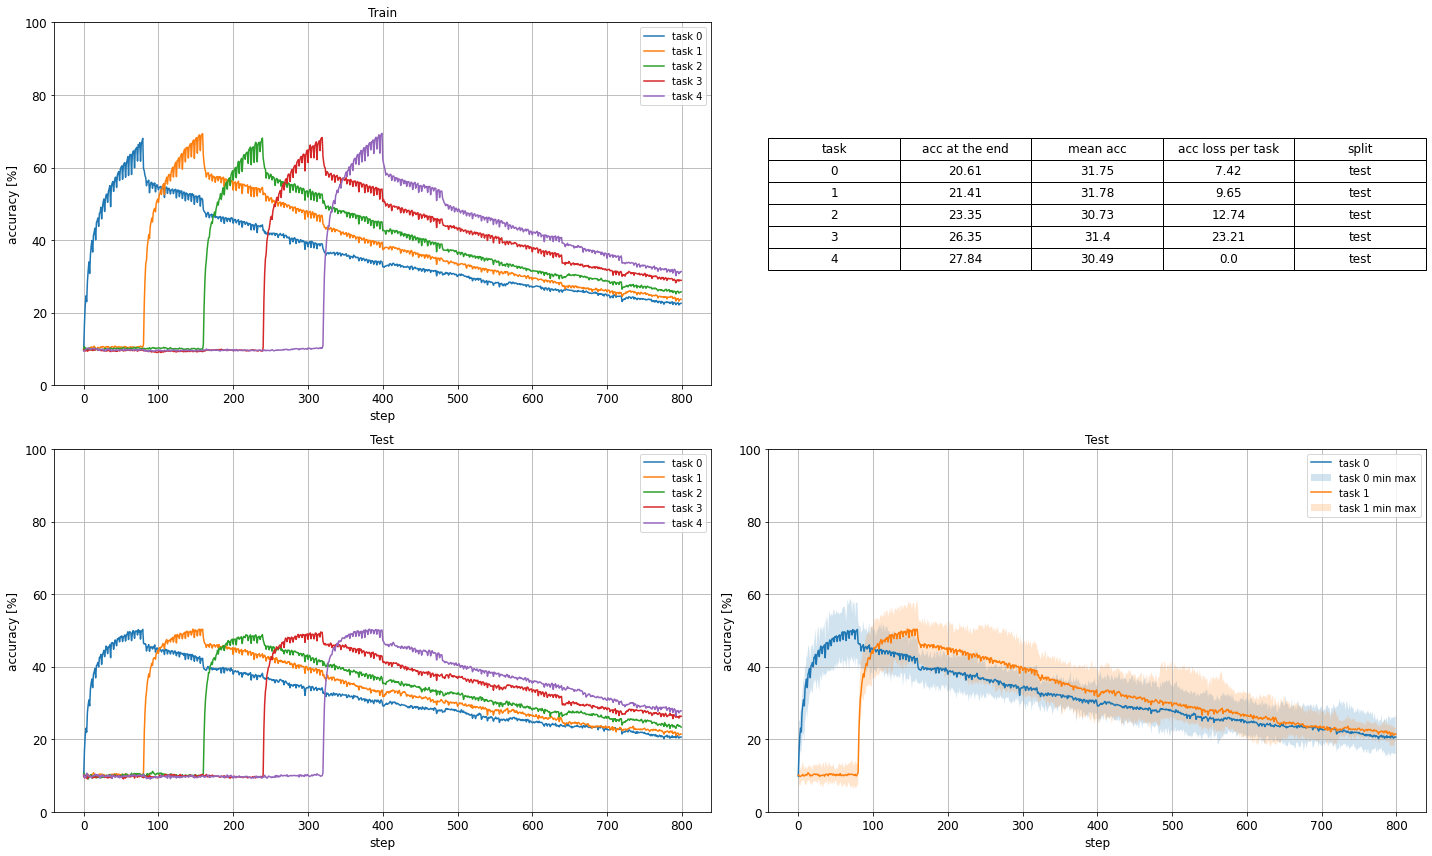

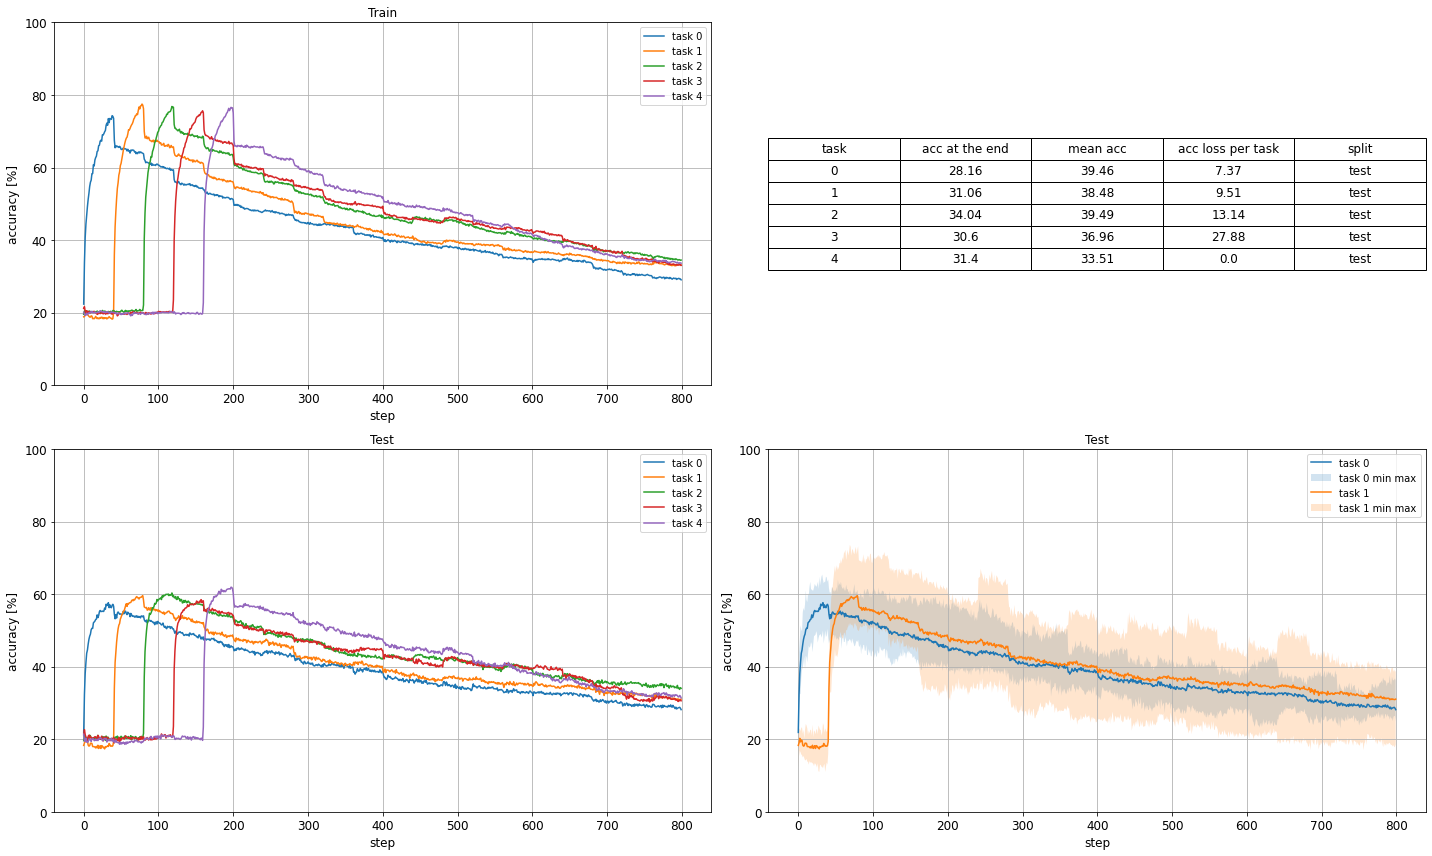

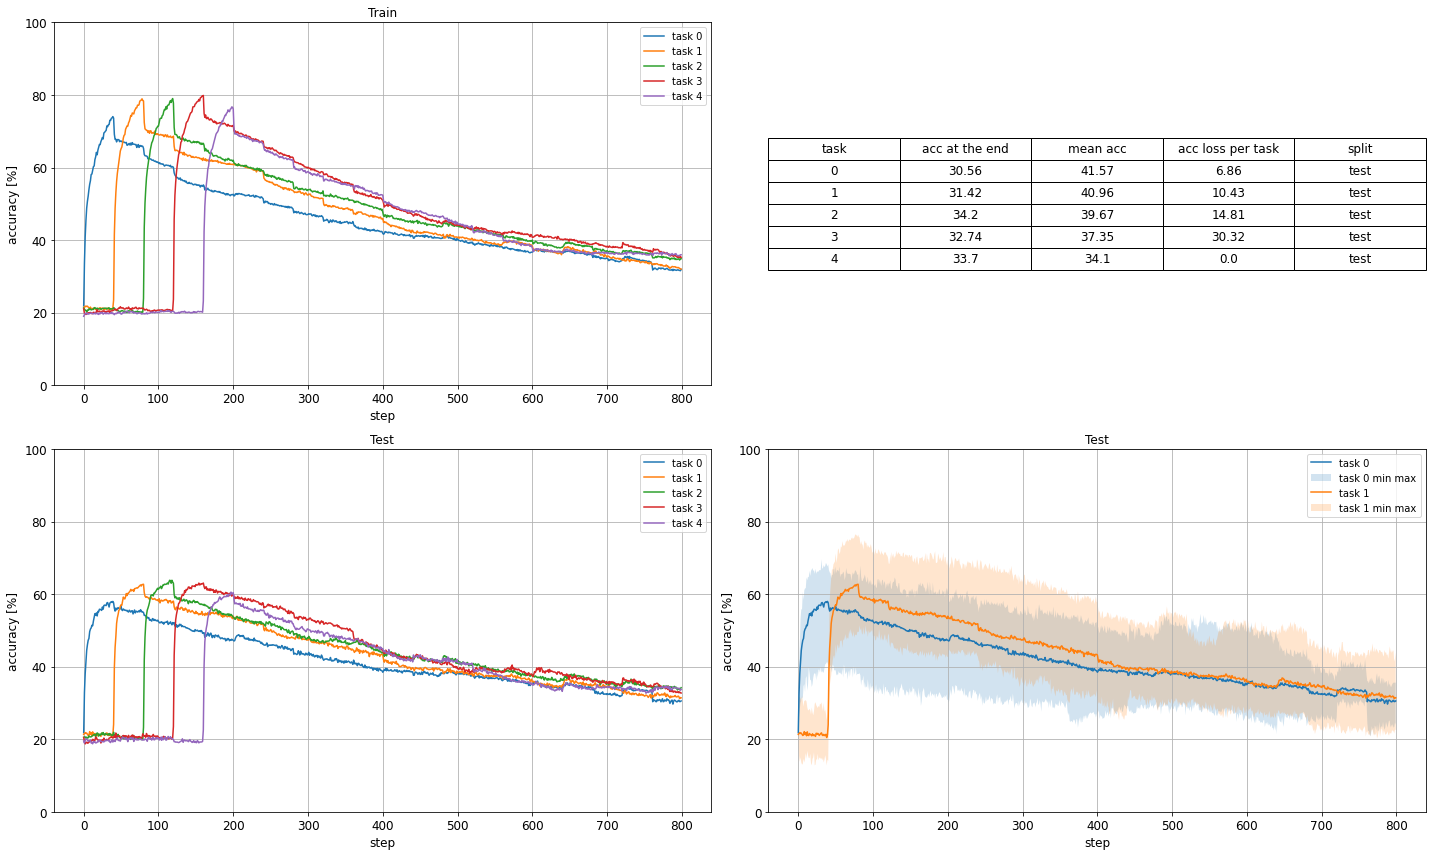

In [12]:
viz.plot_everything()